In [1]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Importing the eda_data.csv file as a dataframe to Python
df = pd.read_csv('CS14_eda_data.csv')


In [2]:

# 2. Creating a Python list that includes the names of all the predictors
predictors = ['Rating', 'size_id', 'sector_id', 'revenue_id', 'state_id', 'same_state', 
              'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len']


In [3]:

# 3. Creating a Python list that includes the name of the dependent variable
dependent_variable = ['six_figure']


In [4]:

# 4. Splitting the dataset into a train set and test set
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[dependent_variable], test_size=0.3, random_state=42)


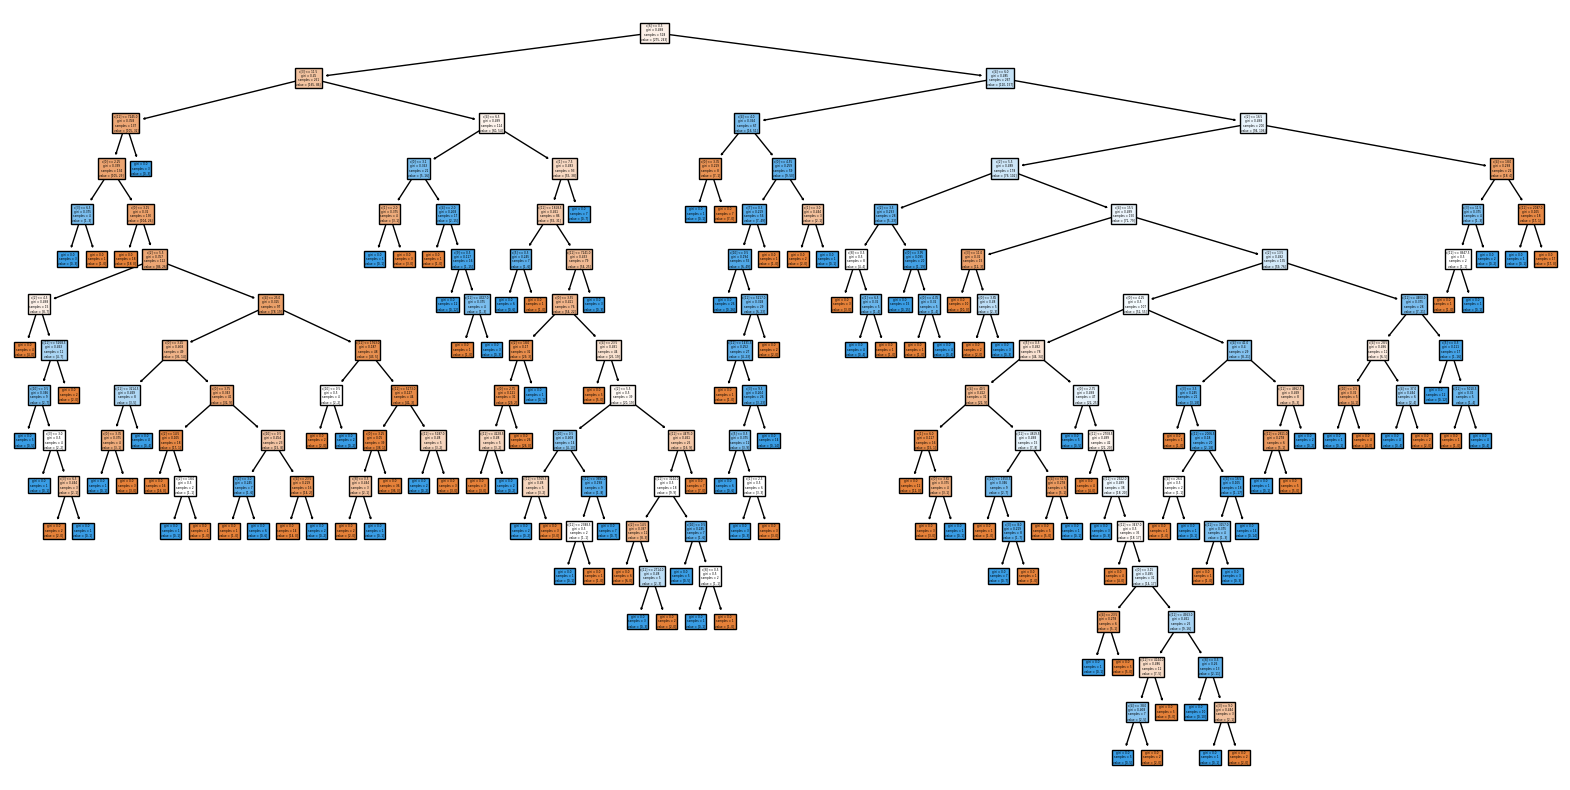

In [5]:

# 5. Developing a decision tree classifier and depicting the tree using the train data set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# To depict the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()


In [6]:

# 6. Calculating the accuracy score of the decision tree model using the test data set
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('Accuracy score of decision tree model:', dt_acc)


Accuracy score of decision tree model: 0.820627802690583


/tmp/ipykernel_26101/1661647352.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


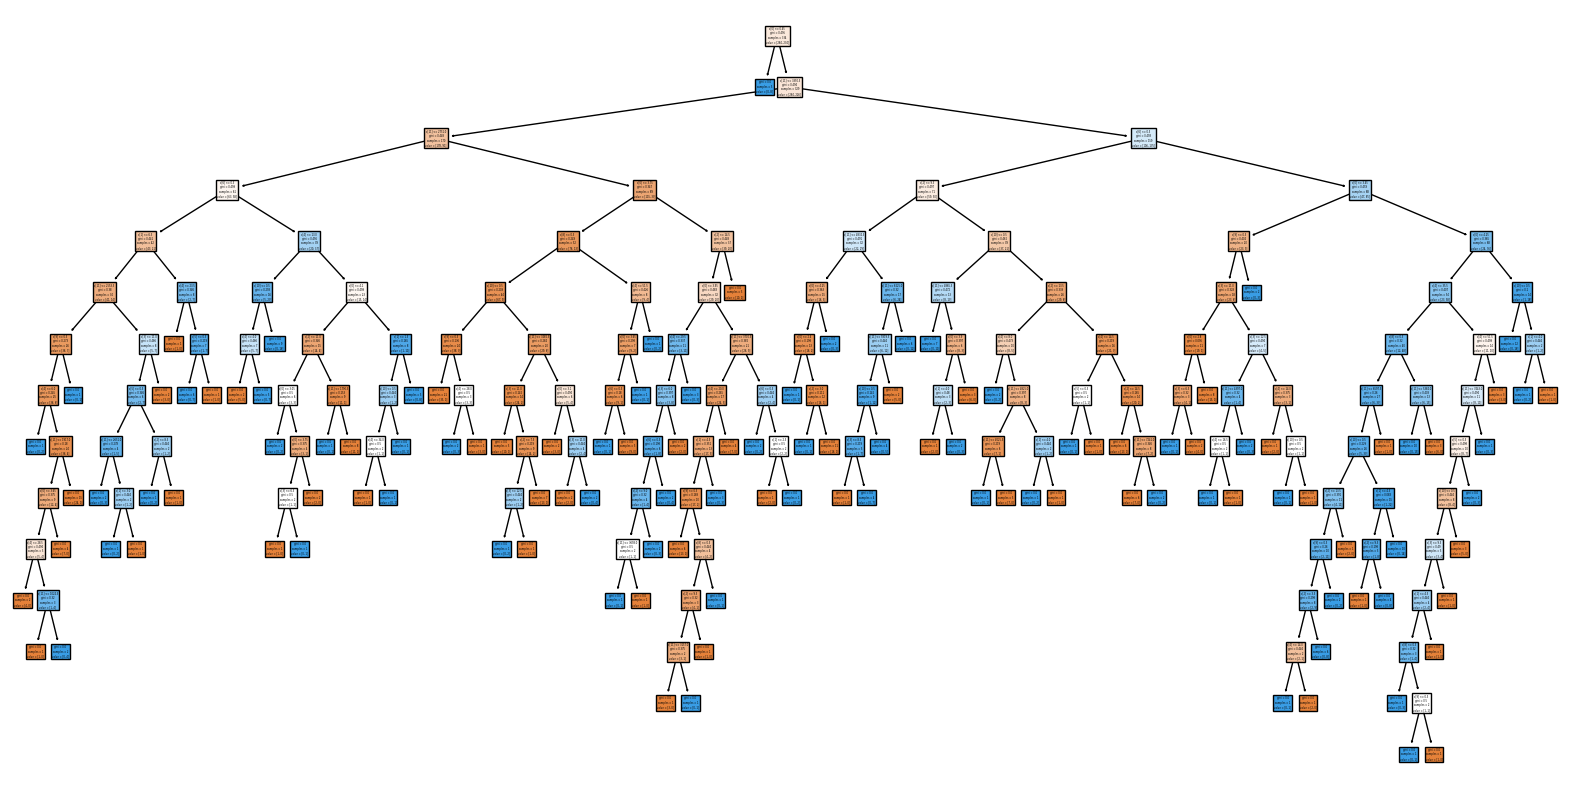

In [7]:

# 7. Developing a random forest model and depicting the tree using the train data set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# To depict the tree
estimator = rf.estimators_[5]
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True)
plt.show()


In [8]:

# 8. Calculating the accuracy score of the random forest model using the test data set
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Accuracy score of random forest model:', rf_acc)


Accuracy score of random forest model: 0.8340807174887892


In [9]:

# 9. Importing the CS14_testsample.csv file as a dataframe to Python
test_df = pd.read_csv('CS14_testsample.csv')


In [10]:
# 10. Making a prediction whether the job postings in the testsample data set are expected to be “six-figure” jobs
# Using the random forest model as it had a higher accuracy score
test_pred = rf.predict(test_df[predictors])
for i, prediction in enumerate(test_pred):
    if prediction == 1:
        print(f"Job {i+1}: a six-figure job ({prediction})")
    else:
        print(f"Job {i+1}: not a six-figure job ({prediction})")



Job 1: not a six-figure job (0)
Job 2: a six-figure job (1)
Job 3: a six-figure job (1)
Job 4: a six-figure job (1)
Job 5: not a six-figure job (0)


In [11]:

# 11. Calculating the importance of each predictor and determining the most important factor when predicting salary
importances = pd.Series(rf.feature_importances_, index=predictors)
print('Feature importances:\n', importances)
print('Most important factor:', importances.idxmax())


Feature importances:
 Rating        0.147777
size_id       0.093226
sector_id     0.113661
revenue_id    0.085452
state_id      0.148248
same_state    0.033083
python_yn     0.054273
R_yn          0.001615
spark         0.027092
aws           0.036975
excel         0.042542
desc_len      0.216056
dtype: float64
Most important factor: desc_len
